In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy
%matplotlib inline

In [2]:
imagePath = "imagenes/box.jpg"

img0 = cv2.imread(imagePath)
img = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)



# Fast Feature Detector

Threshold:  80
nonmaxSuppression:  False
neighborhood:  2
Total Keypoints with nonmaxSuppression:  31
Total Keypoints without nonmaxSuppression:  11


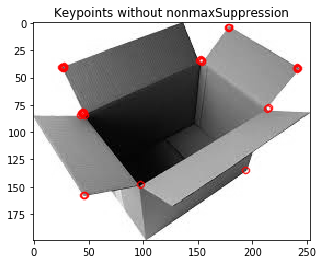

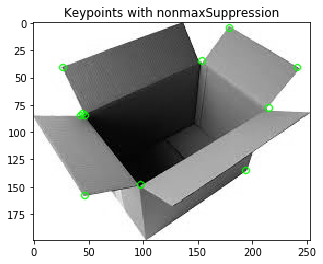

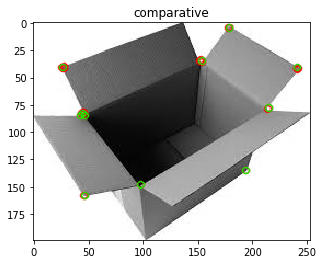

In [3]:
# Initiate FAST object with default values
#fast = cv2.FastFeatureDetector()
threshold=80
fast = cv2.FastFeatureDetector_create(threshold)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)

# find and draw the keypoints
kp = fast.detect(img, None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))


# Print all params
print ("Threshold: ", fast.getThreshold())
print ("nonmaxSuppression: ", fast.getNonmaxSuppression())
print ("neighborhood: ", fast.getType())
print ("Total Keypoints with nonmaxSuppression: ", len(kp))

#cv2.imwrite('fast_true.png',img2)

# Enable nonmaxSuppression
fast.setNonmaxSuppression(1)
kp2 = fast.detect(img,None)

print ("Total Keypoints without nonmaxSuppression: ", len(kp2))

img3 = cv2.drawKeypoints(img, kp2, None, color=(0,255,0))

img4 = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0))


plt.imshow(img2, cmap='gray')
plt.title("Keypoints without nonmaxSuppression")
plt.show()

plt.imshow(img3, cmap='gray')
plt.title("Keypoints with nonmaxSuppression")
plt.show()

plt.imshow(img4, cmap='gray')
plt.title("comparative")
plt.show()


#cv2.imshow('fast_false.png',img3)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#  Harris Corner Detector

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


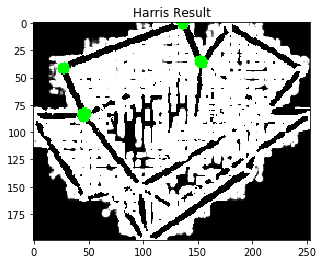

In [4]:
k = float(0.004)
blockSize = int(4)
ksize = int(5)
percentage = 0.5
color = (0, 255, 0)

dst = cv2.cornerHarris(img.astype(np.float32), blockSize, ksize, k)

puntos = dst > percentage * dst.max()
(i,j)=puntos.nonzero()

dstColor = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)

for it in np.arange(0,i.shape[0]):
    cv2.circle(dstColor, (j[it], i[it]), 5, color, cv2.FILLED, cv2.LINE_AA)

plt.imshow(dstColor)
plt.title("Harris Result")
plt.show()

#cv2.imshow('Harris Result', dstColor)
#cv2.waitKey(0)
#cv2.destroyAllWindows()            
            

In [5]:
print(dst.max())
print(dstColor.shape)
print([j,i])

3574140000.0
(199, 253, 3)
[array([136, 137, 136, 137, 152, 153, 153, 154, 154,  28,  27,  28,  45,
        46,  47,  48,  45,  46,  47,  45,  46,  46]), array([ 0,  0,  1,  1, 35, 35, 36, 36, 37, 41, 42, 42, 83, 83, 83, 83, 84,
       84, 84, 85, 85, 86])]


# Shi-Tomasi Feature Detector

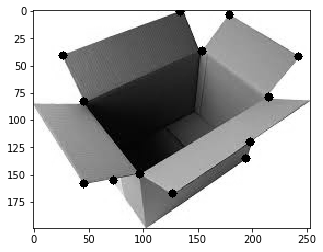

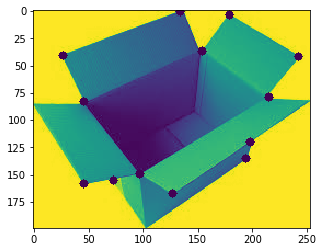

In [6]:
maxCorners = 30  
qualityLevel = 0.1 
minDistance = 10 
corners = cv2.goodFeaturesToTrack(img, maxCorners, qualityLevel, minDistance)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),4,0,-1)
plt.imshow(img, cmap= "gray")
plt.show()
plt.imshow(img)
plt.show()


Las características detectadas dependen mucho de la configuración de los distintos operadores. Se recomienda jugar con los parámetros para ver cómo cambian los resultados.
Si los resultados obtenidos no son lógicos, es posible que el kernel del systema haya dejado de funcionar correctamente. Para reiniciar, en el menú "kernel" seleccione "Restart % Clear Output" y luego en el menú "Cell", seleccione "Run All".